#1. Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#2. DataSet 

In [2]:

x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


#3. Creating function that assigns data point to nearest cluster

In [0]:
#color for each cluster
color_map = np.array(['r','b'])

def assign_data(x1,x2,centers):
  dist_to_cluster1 = np.sqrt(np.square(np.array(x1)-centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
  dist_to_cluster2 = np.sqrt(np.square(np.array(x1)-centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
  cluster = dist_to_cluster1 > dist_to_cluster2
  colors = color_map[cluster + 1 -1]
  return cluster,colors 


#4. Creating function that updates the centroid

In [0]:
def update_centroid(x1,x2,class_of_points):
  # update means
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]


#5. Function used for Visualization

In [0]:
def plot_points(centroids = None,colors = 'g',figure_title = "Not Found"):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1,1,1)
    
    centroid_colors = ['rx', 'bx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    
    #ploting Data points
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

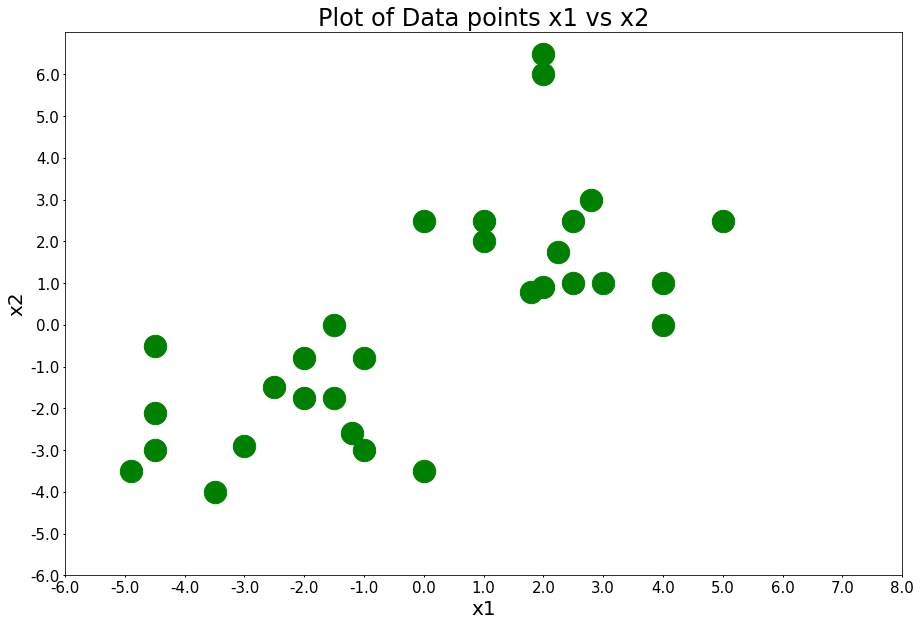

In [6]:
plot_points(figure_title ="Plot of Data points x1 vs x2")

#6. KNN

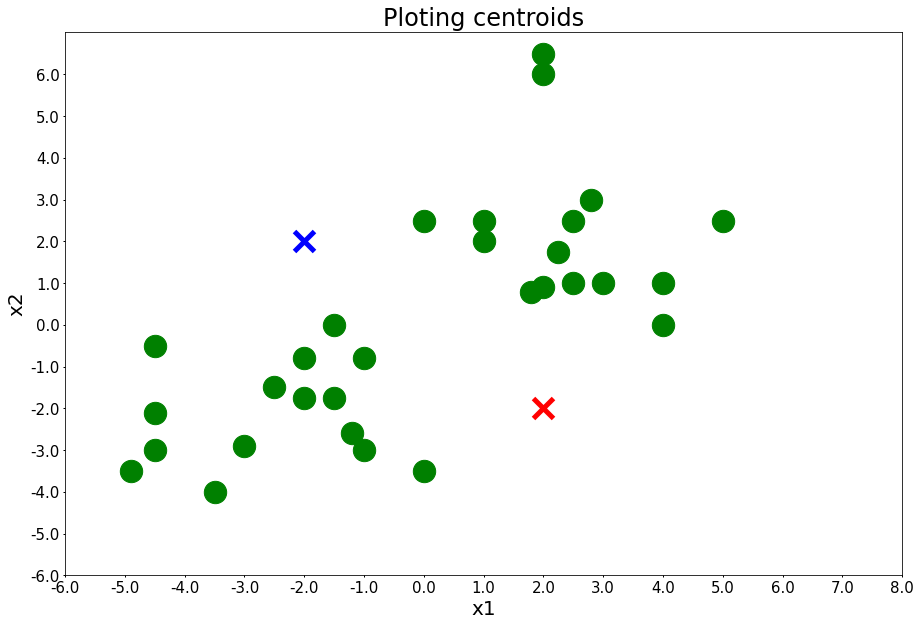

In [7]:
centers = [[2,-2],[-2,2]]
plot_points(centroids=centers,figure_title="Ploting centroids")

Press y/n to update data points ......y


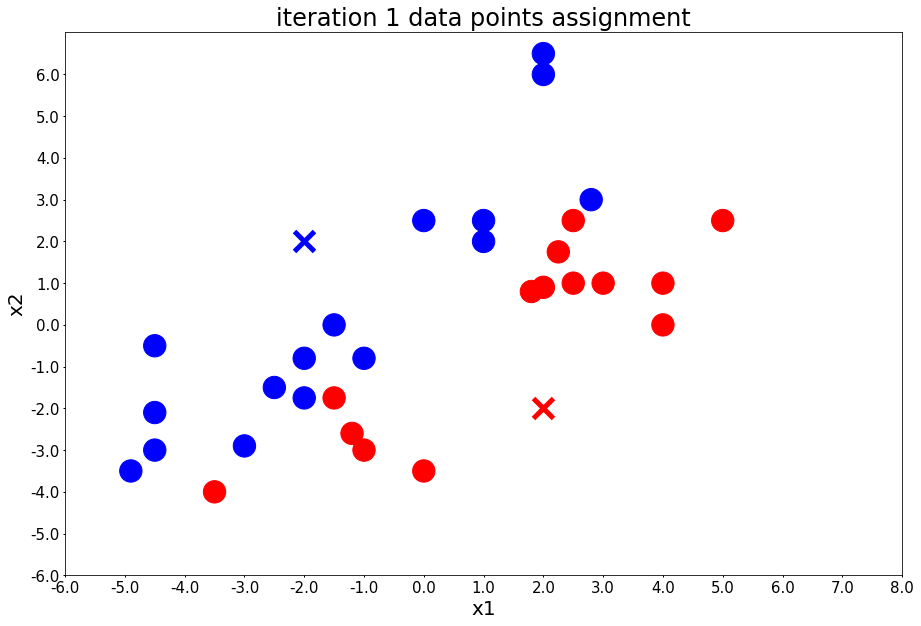

Press y/n to update the centroid.......y


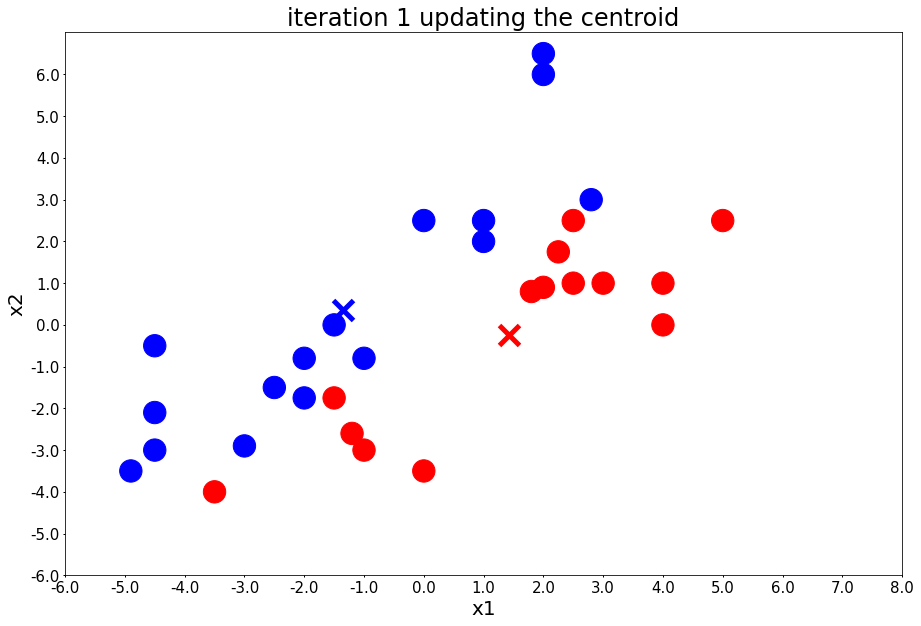

Press y/n to update data points ......y


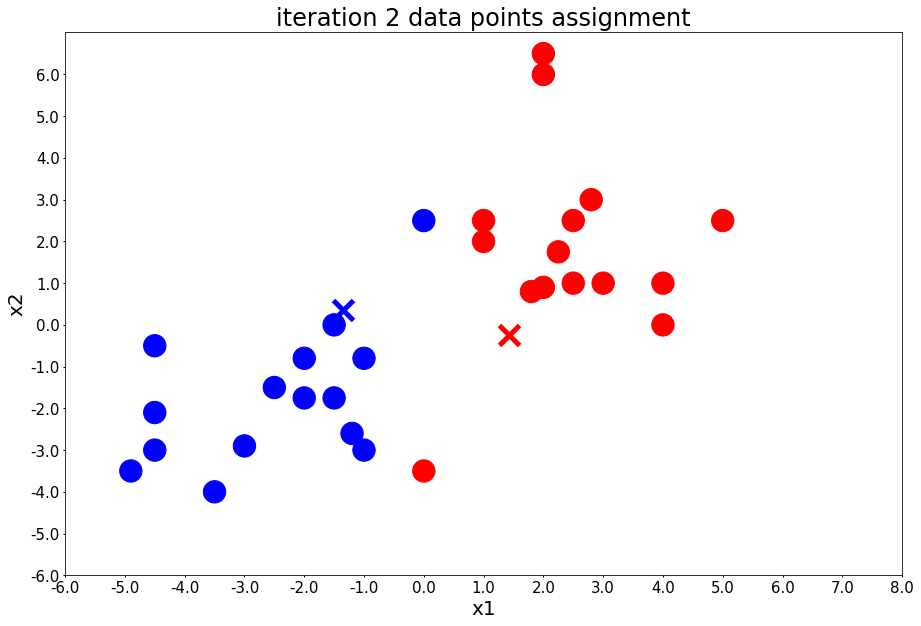

Press y/n to update the centroid.......y


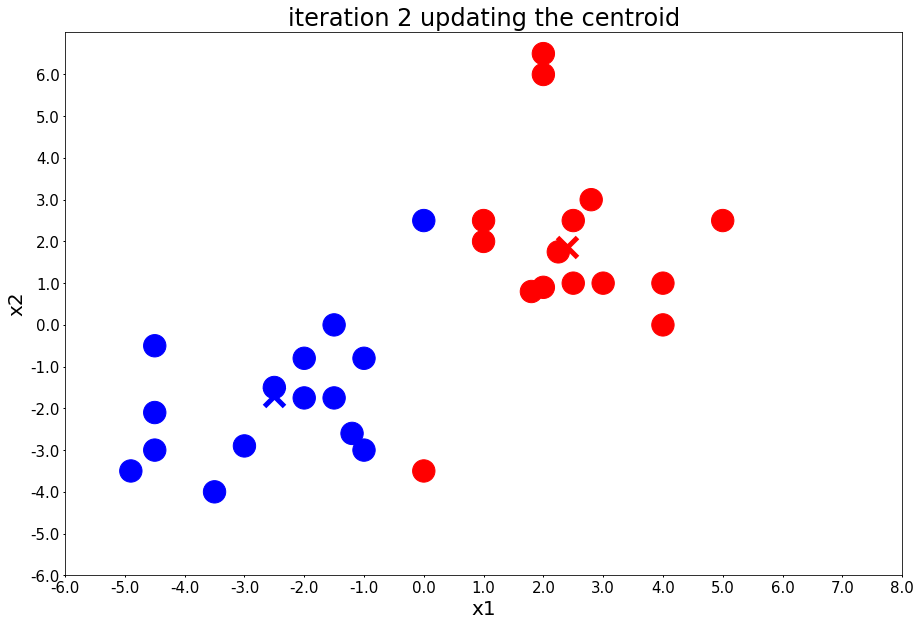

Press y/n to update data points ......y


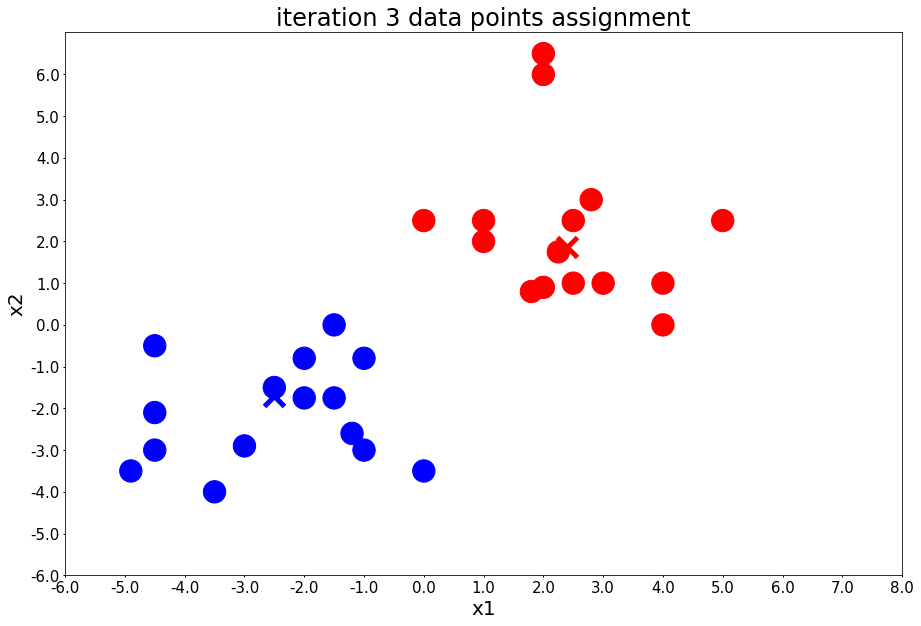

Press y/n to update the centroid.......y


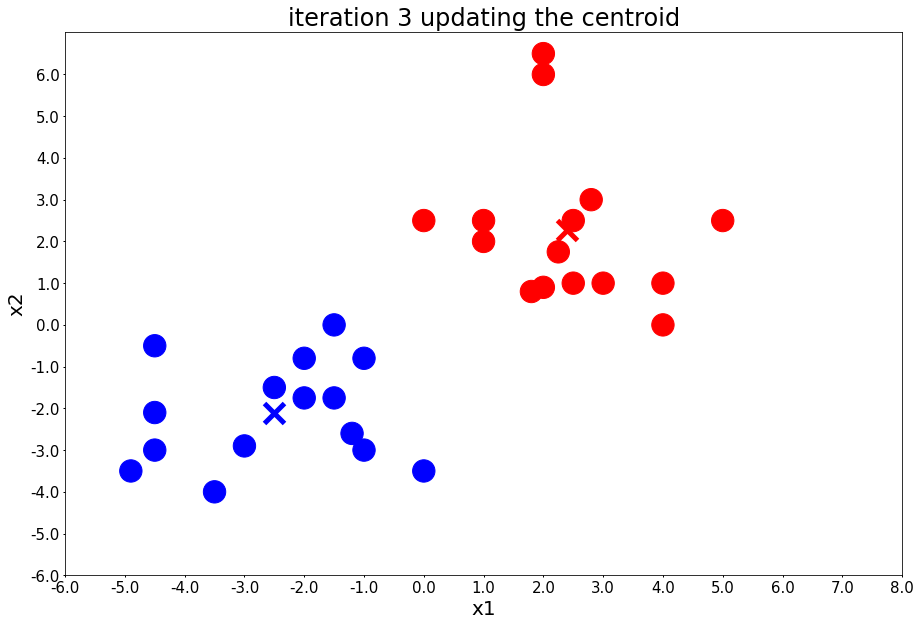

Press y/n to update data points ......y


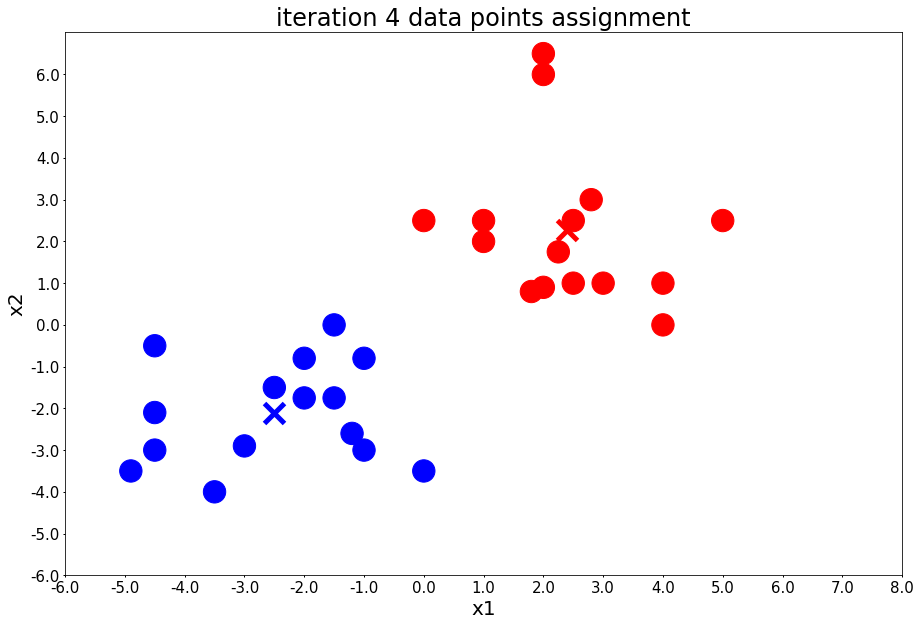

Press y/n to update the centroid.......n


In [8]:
# runnig KNN
iter = 1
while(True):
  #assigning points
  choice1 = input("Press y/n to update data points ......")
  if(choice1 == 'n' or choice1 == 'N'):
    break
  cluster, colors = assign_data(x1,x2,centers)
  title = "iteration {} data points assignment".format(iter)
  plot_points(centroids=centers,colors = colors,figure_title =title)
  
  #updating centroid
  choice2 = input("Press y/n to update the centroid.......")
  if(choice2 == 'n'or choice2=='N'):
    break
  title = "iteration {} updating the centroid".format(iter)
  centers = update_centroid(x1,x2,cluster)
  plot_points(centroids=centers,colors=colors,figure_title=title)
  iter = iter +1
